# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


In [0]:
# Start your codes here!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [4]:
# df=pd.read_csv('google-play-store.csv')
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
def convert_to_mb(inputvalue):
  if(inputvalue is None):
    return 0
  value=inputvalue
  if('k' in inputvalue):
    return float("{0:.2f}".format(float(value.replace('k',''))/1024))
  if('M' in inputvalue):
    return float("{0:.2f}".format(float(value.replace('M',''))))
  return 0

In [6]:
df=pd.read_csv('gdrive/My Drive/CoderSchool/BigASS/assignments/google-play-store.csv')

df.loc[df.index==10472,'Android Ver']=df[df.index==10472]['Current Ver']
df.loc[df.index==10472,'Current Ver']=df[df.index==10472]['Last Updated']
df.loc[df.index==10472,'Last Updated']=df[df.index==10472]['Genres']
df.loc[df.index==10472,'Genres']=df[df.index==10472]['Content Rating']
df.loc[df.index==10472,'Content Rating']=df[df.index==10472]['Price']
df.loc[df.index==10472,'Price']=df[df.index==10472]['Type']
df.loc[df.index==10472,'Type']=df[df.index==10472]['Installs']
df.loc[df.index==10472,'Installs']=df[df.index==10472]['Size']
df.loc[df.index==10472,'Size']=df[df.index==10472]['Reviews']
df.loc[df.index==10472,'Reviews']=df[df.index==10472]['Rating']
df.loc[df.index==10472,'Rating']=df[df.index==10472]['Category']
df.loc[df.index==10472,'Category']=''

df['SizeMB']=df['Size'].apply(convert_to_mb)
df['Price']=df['Price'].str.replace('$','') 

df[df['Price'].str.contains('4', regex=False)]
df['Category']=df['Category'].astype(dtype="category")
df['Type']=df['Type'].astype(dtype="category")
df['Content Rating']=df['Content Rating'].astype(dtype="category")
df['Genres']=df['Genres'].astype(dtype="category")
df['Price']=df['Price'].astype(float)
df['Reviews']=df['Reviews'].astype(int)
df['Rating']=df['Rating'].astype(float)
df['SizeMB']=df['SizeMB'].astype(float)

df.info()


df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
App               10841 non-null object
Category          10841 non-null category
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null category
Price             10841 non-null float64
Content Rating    10841 non-null category
Genres            10840 non-null category
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
SizeMB            10841 non-null float64
dtypes: category(4), float64(3), int64(1), object(6)
memory usage: 897.1+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.00
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.00
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.70
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.00
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.80
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,5.60
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19.00
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29.00
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33.00
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.10


In [7]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [8]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
                          1
Name: Category, dtype: int64

In [9]:
df.sort_values(by='Rating',ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
9056,Santa's Monster Shootout DX,GAME,5.0,4,33M,50+,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,33.0
8395,DG TV,NEWS_AND_MAGAZINES,5.0,3,5.7M,100+,Free,0.00,Everyone,News & Magazines,"May 26, 2018",1.2,4.1 and up,5.7
8493,PK and DK Audio App,FAMILY,5.0,2,3.9M,100+,Free,0.00,Everyone,Entertainment,"October 25, 2017",5.1.4,4.1 and up,3.9
6330,HON. B.J. ACS COLLEGE ALE,FAMILY,5.0,3,1.8M,100+,Free,0.00,Mature 17+,Education,"December 26, 2016",3.1,4.3 and up,1.8
6342,BJ Foods,BUSINESS,5.0,3,1.5M,10+,Free,0.00,Everyone,Business,"February 7, 2018",2.7,4.1 and up,1.5
6363,Read it easy for BK,LIFESTYLE,5.0,1,3.2M,50+,Free,0.00,Everyone,Lifestyle,"July 15, 2018",1.2,4.1 and up,3.2
9766,ER Assist,PRODUCTIVITY,5.0,3,28M,10+,Free,0.00,Everyone,Productivity,"December 6, 2016",0.1.7,4.1 and up,28.0
6364,BK Video Status,FAMILY,5.0,13,2.1M,100+,Free,0.00,Everyone,Entertainment,"July 7, 2018",2.3,4.4 and up,2.1
6372,BK Formula Calculator,TOOLS,5.0,6,11M,100+,Free,0.00,Everyone,Tools,"August 8, 2015",0.1.1,4.2 and up,11.0
6375,Dr Bk Sachin bhai,LIFESTYLE,5.0,19,3.1M,"1,000+",Free,0.00,Everyone,Lifestyle,"December 7, 2017",2.2,4.1 and up,3.1


### category have highest ratin

In [10]:

hicate=df.groupby(by='Category').mean().reset_index()
hicate.sort_values(by='Rating',ascending=False,inplace=True)
# hicate['Category_x']=hicate['Category']
# hicate.reset_index(inplace=True)
hicate

,Category,Rating,Reviews,Price,SizeMB
11,EVENTS,4.435556,2.515906e+03,1.718594,12.436406
9,EDUCATION,4.389032,2.538191e+05,0.115128,14.793269
1,ART_AND_DESIGN,4.358065,2.637600e+04,0.091846,11.800000
4,BOOKS_AND_REFERENCE,4.346067,9.506090e+04,0.518485,11.351082
24,PERSONALIZATION,4.335987,2.279238e+05,0.392755,10.231071
23,PARENTING,4.300000,1.597218e+04,0.159667,20.261667
15,GAME,4.286326,1.385859e+06,0.251136,39.366792
3,BEAUTY,4.278571,7.476226e+03,0.000000,12.233962
16,HEALTH_AND_FITNESS,4.277104,1.111253e+05,0.197478,17.627478
27,SHOPPING,4.259664,4.424662e+05,0.021077,12.504615


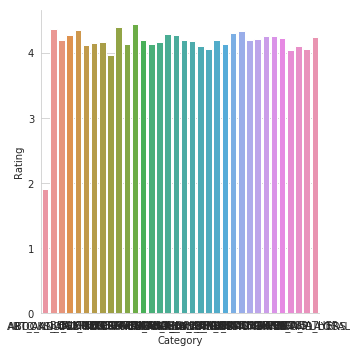

In [11]:
# sns.catplot( y="Rating",x='Category_x', kind="bar", data=hicate)
# sns.barplot(data=hicate.head(5),x='Rating',y='Category')
sns.catplot( x="Category",y='Rating', kind="bar", data=hicate,);

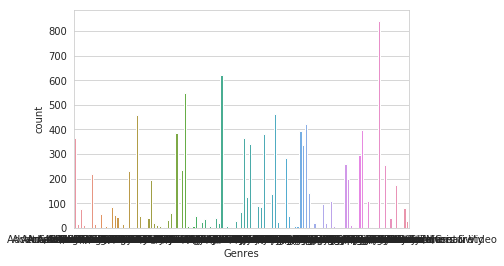

In [12]:
sns.countplot(df['Genres'])

In [13]:
df.corr()

,Rating,Reviews,Price,SizeMB
Rating,1.000000,0.068147,-0.021851,0.046073
Reviews,0.068147,1.000000,-0.009666,0.065467
Price,-0.021851,-0.009666,1.000000,-0.013455
SizeMB,0.046073,0.065467,-0.013455,1.000000


## add to new file csv

In [14]:
!pip install --upgrade -q gspread
!pip install gspread oauth2client
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe 

gc = gspread.authorize(GoogleCredentials.get_application_default())

def check_exists(path):
  try: 
    gc.open(path)
    return True
  except:
    return False

In [0]:
def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
    sh.del_worksheet(sh.sheet1)
    return sh


In [0]:
sheets = {
    # Sheet name: column in this sheet
    'sheet2':df.columns.to_list()
}
sh=create_new_worksheet('GooglePlayStore.csv',sheets)

In [44]:
df['Rating'].fillna(0).values.tolist()
# df.dropna(how='all',inplace=True)
df.dropna(inplace=True)
df.info()

sh.values_update(
    'sheet2!A2', 
    params={'valueInputOption': 'RAW'}, 
    body={'values': df.values.tolist()}
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null category
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null category
Price             9360 non-null float64
Content Rating    9360 non-null category
Genres            9360 non-null category
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
SizeMB            9360 non-null float64
dtypes: category(4), float64(3), int64(1), object(6)
memory usage: 848.7+ KB


{'spreadsheetId': '1qITVB0lcZkttDzEWu0W605JRxt6Xpm5cRaSuCrWMzV8',
 'updatedCells': 131040,
 'updatedColumns': 14,
 'updatedRange': 'sheet2!A2:N9361',
 'updatedRows': 9360}

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null category
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null category
Price             9360 non-null float64
Content Rating    9360 non-null category
Genres            9360 non-null category
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
SizeMB            9360 non-null float64
dtypes: category(4), float64(3), int64(1), object(6)
memory usage: 848.7+ KB
